In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
estimator = "DR"
competition = "L"
agent_num = 3

# Normal Data

In [6]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [4]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  41%|████      | 6730/16384 [00:01<00:01, 4873.62it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 6730



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4282.53it/s]


AUC predicting P(win):				 0.6865817133313535
Estimated Utility	 Mean Error:			 0.20915400634224593
Estimated Utility	 Mean Absolute Error:	 0.22233373097930786



Initialising Policy: 100%|██████████| 16384/16384 [00:12<00:00, 1271.39it/s]


Predicted mu Gammas:  tensor(0.9761, grad_fn=<MinBackward1>) tensor(1.0175, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0407, grad_fn=<MinBackward1>) tensor(0.0708, grad_fn=<MaxBackward1>) tensor(0.0512, grad_fn=<MeanBackward0>)



DR 1:  12%|█▏        | 4034/32768 [00:05<00:36, 783.08it/s]


Stopping at Epoch 4034
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  0.6358542 0.8045013 0.7140835
agent: 1




DR 2:  29%|██▊       | 4699/16384 [00:01<00:03, 3304.99it/s]


Stopping at Epoch 4699



DR 2:  68%|██████▊   | 22395/32768 [00:05<00:02, 4220.63it/s]

Epoch 21934: reducing learning rate of group 0 to 6.0000e-04.
Epoch 22202: reducing learning rate of group 0 to 1.2000e-04.
Epoch 22459: reducing learning rate of group 0 to 2.4000e-05.
Epoch 22716: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  72%|███████▏  | 23479/32768 [00:05<00:02, 4188.01it/s]


Epoch 22973: reducing learning rate of group 0 to 9.6000e-07.
Epoch 23230: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 23479
AUC predicting P(win):				 0.8024400865186041
Estimated Utility	 Mean Error:			 0.5406892690972059
Estimated Utility	 Mean Absolute Error:	 0.5676573379323786



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1250.27it/s]


Predicted mu Gammas:  tensor(0.9850, grad_fn=<MinBackward1>) tensor(1.0049, grad_fn=<MaxBackward1>) tensor(0.9997, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0447, grad_fn=<MinBackward1>) tensor(0.0659, grad_fn=<MaxBackward1>) tensor(0.0504, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 75/32768 [00:00<00:44, 742.23it/s]

Epoch 00122: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 225/32768 [00:00<00:44, 731.76it/s]

Epoch 00223: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 299/32768 [00:00<00:44, 732.88it/s]

Epoch 00324: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 446/32768 [00:00<00:44, 729.36it/s]

Epoch 00425: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 535/32768 [00:00<00:44, 721.14it/s]


Epoch 00526: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 535
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  28%|██▊       | 4551/16384 [00:01<00:04, 2933.92it/s]


Stopping at Epoch 4551



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4273.53it/s]


AUC predicting P(win):				 0.8709335096804433
Estimated Utility	 Mean Error:			 0.7819871659138449
Estimated Utility	 Mean Absolute Error:	 0.8424519983066237



Initialising Policy:  62%|██████▏   | 10218/16384 [00:08<00:04, 1272.45it/s]


Stopping at Epoch 10218
Predicted mu Gammas:  tensor(0.9870, grad_fn=<MinBackward1>) tensor(1.0035, grad_fn=<MaxBackward1>) tensor(0.9994, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0480, grad_fn=<MinBackward1>) tensor(0.0646, grad_fn=<MaxBackward1>) tensor(0.0517, grad_fn=<MeanBackward0>)



DR 3:  33%|███▎      | 10704/32768 [00:13<00:28, 786.04it/s]


Stopping at Epoch 10704
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  0.6444878 1.0 0.7548251
number of iteration: 1

agent: 0




DR 1:  22%|██▏       | 3608/16384 [00:00<00:03, 3621.45it/s]


Stopping at Epoch 3608
AUC predicting P(win):				 0.7651595793450783
Estimated Utility	 Mean Error:			 0.10099800009537765
Estimated Utility	 Mean Absolute Error:	 0.2329729917908828



DR 1:  67%|██████▋   | 22036/32768 [00:05<00:02, 4166.23it/s]

Epoch 21414: reducing learning rate of group 0 to 6.0000e-04.
Epoch 21694: reducing learning rate of group 0 to 1.2000e-04.
Epoch 21951: reducing learning rate of group 0 to 2.4000e-05.
Epoch 22208: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  70%|███████   | 23072/32768 [00:05<00:02, 4128.62it/s]


Epoch 22465: reducing learning rate of group 0 to 9.6000e-07.
Epoch 22722: reducing learning rate of group 0 to 1.9200e-07.
Epoch 22979: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 23072
AUC predicting P(win):				 0.7653576063026327
Estimated Utility	 Mean Error:			 0.16948538832897392
Estimated Utility	 Mean Absolute Error:	 0.2801875815160782



DR 1:   1%|          | 394/32768 [00:00<00:41, 776.10it/s]

Epoch 00294: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00428: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   2%|▏         | 708/32768 [00:00<00:41, 776.21it/s]

Epoch 00591: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00692: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   3%|▎         | 943/32768 [00:01<00:41, 775.61it/s]

Epoch 00793: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00894: reducing learning rate of group 0 to 4.4800e-07.



DR 1:   3%|▎         | 1101/32768 [00:01<00:40, 779.60it/s]

Epoch 00995: reducing learning rate of group 0 to 8.9600e-08.
Epoch 01096: reducing learning rate of group 0 to 1.7920e-08.



DR 1:   4%|▍         | 1411/32768 [00:01<00:40, 772.73it/s]


Stopping at Epoch 1411
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  0.66488266 0.78937775 0.7228534
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3702.91it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8749487241722413
Estimated Utility	 Mean Error:			 0.03976673936079044
Estimated Utility	 Mean Absolute Error:	 0.24678975926433966



DR 2:  54%|█████▎    | 17577/32768 [00:04<00:03, 4170.37it/s]

Epoch 17000: reducing learning rate of group 0 to 6.0000e-04.
Epoch 17258: reducing learning rate of group 0 to 1.2000e-04.
Epoch 17515: reducing learning rate of group 0 to 2.4000e-05.
Epoch 17772: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  56%|█████▋    | 18467/32768 [00:04<00:03, 4147.54it/s]


Epoch 18029: reducing learning rate of group 0 to 9.6000e-07.
Epoch 18286: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 18467
AUC predicting P(win):				 0.8884794658939452
Estimated Utility	 Mean Error:			 0.03976673936079044
Estimated Utility	 Mean Absolute Error:	 0.24678975926433966



DR 2:   1%|          | 237/32768 [00:00<00:41, 790.17it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|▏         | 477/32768 [00:00<00:40, 788.09it/s]

Epoch 00335: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00436: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 637/32768 [00:00<00:40, 791.11it/s]

Epoch 00539: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00640: reducing learning rate of group 0 to 4.4800e-07.



DR 2:   3%|▎         | 877/32768 [00:01<00:40, 790.78it/s]

Epoch 00741: reducing learning rate of group 0 to 8.9600e-08.
Epoch 00842: reducing learning rate of group 0 to 1.7920e-08.



DR 2:   4%|▍         | 1416/32768 [00:01<00:39, 785.84it/s]


Stopping at Epoch 1416
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  0.9716402 1.0 0.99999577
agent: 2




DR 3:   9%|▉         | 1481/16384 [00:00<00:04, 3598.60it/s]


Stopping at Epoch 1481
AUC predicting P(win):				 0.8170658828941239
Estimated Utility	 Mean Error:			 0.06098794783286269
Estimated Utility	 Mean Absolute Error:	 0.2848693722894021



DR 3:  47%|████▋     | 15249/32768 [00:03<00:04, 4228.15it/s]

Epoch 14777: reducing learning rate of group 0 to 6.0000e-04.
Epoch 15036: reducing learning rate of group 0 to 1.2000e-04.
Epoch 15293: reducing learning rate of group 0 to 2.4000e-05.
Epoch 15550: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  49%|████▉     | 16181/32768 [00:03<00:03, 4197.35it/s]


Epoch 15807: reducing learning rate of group 0 to 9.6000e-07.
Epoch 16064: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 16181
AUC predicting P(win):				 0.8311747163913248
Estimated Utility	 Mean Error:			 0.09649248444829081
Estimated Utility	 Mean Absolute Error:	 0.2958566460280425



DR 3:   5%|▌         | 1789/32768 [00:02<00:39, 782.96it/s]


Stopping at Epoch 1789
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  0.5227429 1.0 0.81479436
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:03, 4690.11it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7890690451532391
Estimated Utility	 Mean Error:			 0.004892474351860586
Estimated Utility	 Mean Absolute Error:	 0.16089181461021676



DR 1:  31%|███▏      | 10298/32768 [00:02<00:05, 4278.48it/s]

Epoch 09708: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09997: reducing learning rate of group 0 to 1.2000e-04.
Epoch 10254: reducing learning rate of group 0 to 2.4000e-05.
Epoch 10511: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  34%|███▍      | 11146/32768 [00:02<00:05, 4244.96it/s]


Epoch 10768: reducing learning rate of group 0 to 9.6000e-07.
Epoch 11025: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 11146
AUC predicting P(win):				 0.799324678935565
Estimated Utility	 Mean Error:			 0.0032725310833850133
Estimated Utility	 Mean Absolute Error:	 0.15514421792965996



DR 1:  42%|████▏     | 13815/32768 [00:18<00:24, 762.76it/s]


Stopping at Epoch 13815
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.5724482 0.77560323 0.690961
agent: 1




DR 2:   6%|▋         | 1033/16384 [00:00<00:04, 3188.62it/s][A


Stopping at Epoch 1033
AUC predicting P(win):				 0.8194859573358676
Estimated Utility	 Mean Error:			 0.007679809384177201
Estimated Utility	 Mean Absolute Error:	 0.3476153583106412



DR 2:  16%|█▌        | 5164/32768 [00:01<00:06, 4273.14it/s]

Epoch 04481: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04828: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05085: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  18%|█▊        | 5925/32768 [00:01<00:06, 4275.05it/s]


Epoch 05342: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05599: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05856: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5925
AUC predicting P(win):				 0.8219959863084549
Estimated Utility	 Mean Error:			 0.007679809384177201
Estimated Utility	 Mean Absolute Error:	 0.3476153583106412



DR 2:   1%|          | 242/32768 [00:00<00:41, 792.71it/s]

Epoch 00106: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00243: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|▏         | 483/32768 [00:00<00:40, 797.06it/s]

Epoch 00400: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00501: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 726/32768 [00:00<00:40, 795.55it/s]

Epoch 00602: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00703: reducing learning rate of group 0 to 4.4800e-07.



DR 2:   2%|▏         | 811/32768 [00:01<00:40, 791.65it/s]


Epoch 00804: reducing learning rate of group 0 to 8.9600e-08.
Stopping at Epoch 811
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:04, 3568.74it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6784279840190273
Estimated Utility	 Mean Error:			 0.003071357699717609
Estimated Utility	 Mean Absolute Error:	 0.2887859522985534



DR 3:  11%|█▏        | 3731/32768 [00:00<00:07, 4118.52it/s]

Epoch 03007: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03264: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03521: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03778: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  13%|█▎        | 4393/32768 [00:01<00:06, 4109.14it/s]


Epoch 04035: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04292: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4393
AUC predicting P(win):				 0.6716862099614258
Estimated Utility	 Mean Error:			 0.01223073865220494
Estimated Utility	 Mean Absolute Error:	 0.2944290467147585



DR 3:  16%|█▋        | 5347/32768 [00:06<00:35, 773.36it/s]


Stopping at Epoch 5347
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.4207401 1.0 0.768765


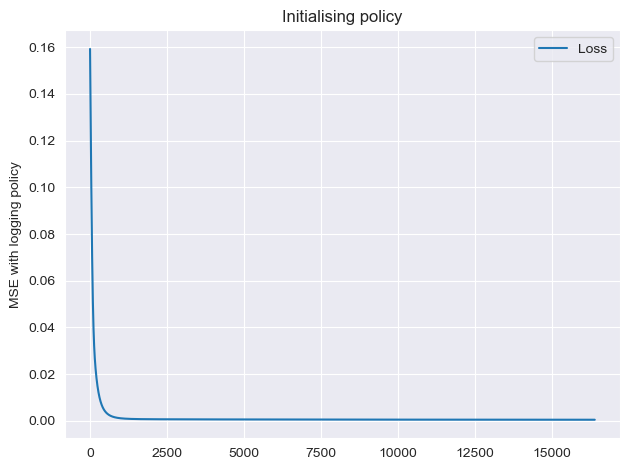

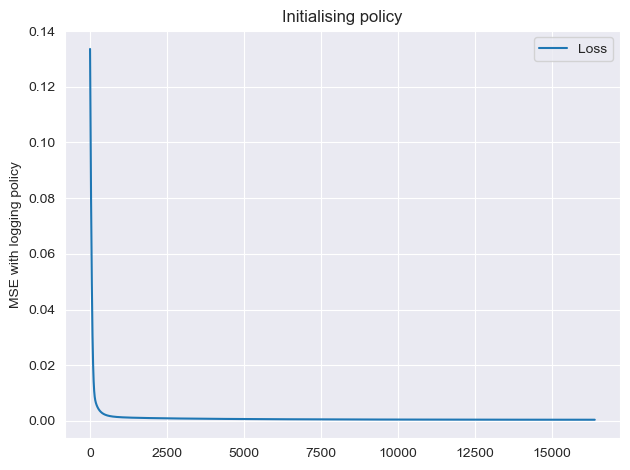

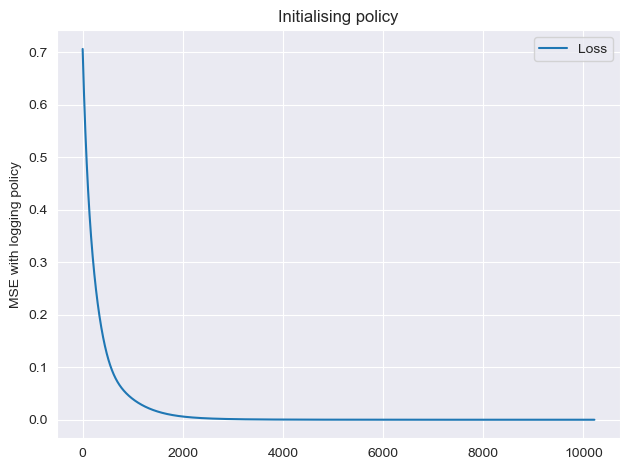

In [5]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [6]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'test':{}}


num_data = [80000, 20000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

# New Data

In [3]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [4]:
# Instantiate Agent and Auction objects
agents_complex = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction_complex, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents_complex,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  36%|███▌      | 5889/16384 [00:01<00:02, 3835.95it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 5889



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4117.97it/s]


AUC predicting P(win):				 0.7673755751961873
Estimated Utility	 Mean Error:			 0.2937712436936072
Estimated Utility	 Mean Absolute Error:	 0.32076474374486974



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1198.79it/s]


Predicted mu Gammas:  tensor(0.9868, grad_fn=<MinBackward1>) tensor(1.0107, grad_fn=<MaxBackward1>) tensor(0.9997, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0299, grad_fn=<MinBackward1>) tensor(0.1072, grad_fn=<MaxBackward1>) tensor(0.0484, grad_fn=<MeanBackward0>)



DR 1:  18%|█▊        | 5981/32768 [00:08<00:39, 670.19it/s]


Stopping at Epoch 5981
DR 1 Number of samples:  torch.Size([6704, 2])
DR 1 Predicted Gammas:  0.65746284 0.88543695 0.73645455
agent: 1




DR 2:  40%|███▉      | 6533/16384 [00:01<00:02, 3390.76it/s]


Stopping at Epoch 6533



DR 2:  94%|█████████▍| 30780/32768 [00:07<00:00, 4027.79it/s]

Epoch 30322: reducing learning rate of group 0 to 6.0000e-04.
Epoch 30589: reducing learning rate of group 0 to 1.2000e-04.
Epoch 30846: reducing learning rate of group 0 to 2.4000e-05.
Epoch 31103: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  97%|█████████▋| 31788/32768 [00:07<00:00, 3982.15it/s]


Epoch 31360: reducing learning rate of group 0 to 9.6000e-07.
Epoch 31617: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 31788
AUC predicting P(win):				 0.8071139834143553
Estimated Utility	 Mean Error:			 0.44923603894868014
Estimated Utility	 Mean Absolute Error:	 0.4688288199609194



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1225.92it/s]


Predicted mu Gammas:  tensor(0.9621, grad_fn=<MinBackward1>) tensor(1.0190, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0436, grad_fn=<MinBackward1>) tensor(0.0704, grad_fn=<MaxBackward1>) tensor(0.0516, grad_fn=<MeanBackward0>)



DR 2:   0%|          | 63/32768 [00:00<00:52, 623.21it/s]

Epoch 00125: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 209/32768 [00:00<00:46, 702.33it/s]

Epoch 00226: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 354/32768 [00:00<00:45, 712.32it/s]

Epoch 00327: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 426/32768 [00:00<00:45, 711.32it/s]

Epoch 00428: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 498/32768 [00:00<00:50, 644.95it/s]

Epoch 00529: reducing learning rate of group 0 to 2.2400e-06.


DR 2:   2%|▏         | 539/32768 [00:00<00:48, 661.13it/s]


Stopping at Epoch 539
DR 2 Number of samples:  torch.Size([6622, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:  34%|███▍      | 5585/16384 [00:01<00:03, 2971.66it/s]


Stopping at Epoch 5585



DR 3: 100%|██████████| 32768/32768 [00:07<00:00, 4149.07it/s]


AUC predicting P(win):				 0.8769514534853466
Estimated Utility	 Mean Error:			 0.6727088338023145
Estimated Utility	 Mean Absolute Error:	 0.7214295677225154



Initialising Policy:  91%|█████████ | 14887/16384 [00:12<00:01, 1229.61it/s]


Stopping at Epoch 14887
Predicted mu Gammas:  tensor(0.9961, grad_fn=<MinBackward1>) tensor(1.0138, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0349, grad_fn=<MinBackward1>) tensor(0.0975, grad_fn=<MaxBackward1>) tensor(0.0503, grad_fn=<MeanBackward0>)



DR 3:  22%|██▏       | 7245/32768 [00:10<00:36, 707.51it/s]


Stopping at Epoch 7245
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.58738875 1.0 0.7644433
number of iteration: 1

agent: 0




DR 1:   7%|▋         | 1145/16384 [00:00<00:03, 4096.50it/s][A


Stopping at Epoch 1145
AUC predicting P(win):				 0.7415965692576416
Estimated Utility	 Mean Error:			 -0.026353229040584902
Estimated Utility	 Mean Absolute Error:	 0.1633440506894509



DR 1:  39%|███▉      | 12735/32768 [00:03<00:04, 4103.95it/s]

Epoch 12078: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12337: reducing learning rate of group 0 to 1.2000e-04.
Epoch 12594: reducing learning rate of group 0 to 2.4000e-05.
Epoch 12851: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  42%|████▏     | 13607/32768 [00:03<00:04, 4056.08it/s]


Epoch 13108: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13365: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 13607
AUC predicting P(win):				 0.7390539690553921
Estimated Utility	 Mean Error:			 0.014048722818063108
Estimated Utility	 Mean Absolute Error:	 0.17348618453452283



DR 1:  18%|█▊        | 5738/32768 [00:07<00:37, 723.73it/s]


Stopping at Epoch 5738
DR 1 Number of samples:  torch.Size([6702, 2])
DR 1 Predicted Gammas:  0.68958485 0.8534319 0.76241785
agent: 1




DR 2:  23%|██▎       | 3693/16384 [00:01<00:04, 2606.27it/s]


Stopping at Epoch 3693
AUC predicting P(win):				 0.8680821229412528
Estimated Utility	 Mean Error:			 0.32583037564919265
Estimated Utility	 Mean Absolute Error:	 0.46503338637872466



DR 2:  84%|████████▎ | 27404/32768 [00:06<00:01, 4313.05it/s]

Epoch 26793: reducing learning rate of group 0 to 6.0000e-04.
Epoch 27053: reducing learning rate of group 0 to 1.2000e-04.
Epoch 27310: reducing learning rate of group 0 to 2.4000e-05.
Epoch 27567: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  86%|████████▌ | 28059/32768 [00:06<00:01, 4256.99it/s]


Epoch 27824: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 28059
AUC predicting P(win):				 0.8686334524813036
Estimated Utility	 Mean Error:			 0.32583037564919265
Estimated Utility	 Mean Absolute Error:	 0.46503338637872466



DR 2:   1%|          | 228/32768 [00:00<00:44, 730.11it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|▏         | 453/32768 [00:00<00:44, 733.41it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 606/32768 [00:00<00:43, 746.47it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 2:   3%|▎         | 827/32768 [00:01<00:44, 713.30it/s]

Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.
Epoch 00809: reducing learning rate of group 0 to 1.7920e-08.



DR 2:   3%|▎         | 1135/32768 [00:01<00:43, 730.06it/s]


Stopping at Epoch 1135
DR 2 Number of samples:  torch.Size([6664, 2])
DR 2 Predicted Gammas:  1.0 1.0 1.0
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4497.19it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.688809670303723
Estimated Utility	 Mean Error:			 0.0037239753636312545
Estimated Utility	 Mean Absolute Error:	 0.15242978173297161



DR 3:  22%|██▏       | 7334/32768 [00:01<00:05, 4340.82it/s]

Epoch 06585: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06915: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07172: reducing learning rate of group 0 to 2.4000e-05.
Epoch 07429: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  25%|██▍       | 8149/32768 [00:01<00:05, 4301.73it/s]


Epoch 07686: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07943: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8149
AUC predicting P(win):				 0.6941331397663856
Estimated Utility	 Mean Error:			 0.014372752942492713
Estimated Utility	 Mean Absolute Error:	 0.15823596374858614



DR 3:  40%|███▉      | 13081/32768 [00:17<00:26, 744.62it/s]


Stopping at Epoch 13081
DR 3 Number of samples:  torch.Size([6634, 2])
DR 3 Predicted Gammas:  0.60665 1.0 0.8534711
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3623.29it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7511202405736757
Estimated Utility	 Mean Error:			 -0.004139152388672282
Estimated Utility	 Mean Absolute Error:	 0.2050238137550203



DR 1:  23%|██▎       | 7390/32768 [00:01<00:06, 4146.42it/s]

Epoch 06644: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06932: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07189: reducing learning rate of group 0 to 2.4000e-05.
Epoch 07446: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  25%|██▍       | 8097/32768 [00:01<00:06, 4076.05it/s]


Epoch 07703: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07960: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8097
AUC predicting P(win):				 0.7543961138098543
Estimated Utility	 Mean Error:			 0.005844507835544564
Estimated Utility	 Mean Absolute Error:	 0.20732424985551579



DR 1:  22%|██▏       | 7363/32768 [00:09<00:33, 758.06it/s]


Stopping at Epoch 7363
DR 1 Number of samples:  torch.Size([6632, 2])
DR 1 Predicted Gammas:  0.6643647 0.8100338 0.7126468
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2669.82it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8752046892499237
Estimated Utility	 Mean Error:			 0.0029932361589848086
Estimated Utility	 Mean Absolute Error:	 0.3299689578767152



DR 2:  14%|█▍        | 4513/32768 [00:01<00:06, 4096.47it/s]

Epoch 04095: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04419: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04676: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  17%|█▋        | 5422/32768 [00:01<00:06, 4084.38it/s]


Epoch 04933: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05190: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 5422
AUC predicting P(win):				 0.8898202551161404
Estimated Utility	 Mean Error:			 0.0029932361589848086
Estimated Utility	 Mean Absolute Error:	 0.3299689578767152



DR 2:   6%|▌         | 1932/32768 [00:02<00:41, 739.55it/s]

Epoch 01790: reducing learning rate of group 0 to 1.4000e-03.



DR 2:  59%|█████▊    | 19201/32768 [00:25<00:18, 742.16it/s]


Stopping at Epoch 19201
DR 2 Number of samples:  torch.Size([6670, 2])
DR 2 Predicted Gammas:  0.93772334 1.0 0.9995918
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:03, 4179.95it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.6919655568393632
Estimated Utility	 Mean Error:			 -0.015559222171080363
Estimated Utility	 Mean Absolute Error:	 0.18068083248986913



DR 3:  10%|█         | 3379/32768 [00:00<00:06, 4232.28it/s]

Epoch 02667: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02924: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03181: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03438: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  13%|█▎        | 4186/32768 [00:00<00:06, 4192.02it/s]


Epoch 03695: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03952: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4186
AUC predicting P(win):				 0.7192226502143587
Estimated Utility	 Mean Error:			 0.0004258691432383537
Estimated Utility	 Mean Absolute Error:	 0.18708947926481587



DR 3:  22%|██▏       | 7172/32768 [00:09<00:35, 723.84it/s]


Stopping at Epoch 7172
DR 3 Number of samples:  torch.Size([6698, 2])
DR 3 Predicted Gammas:  0.65350246 1.0 0.87390023


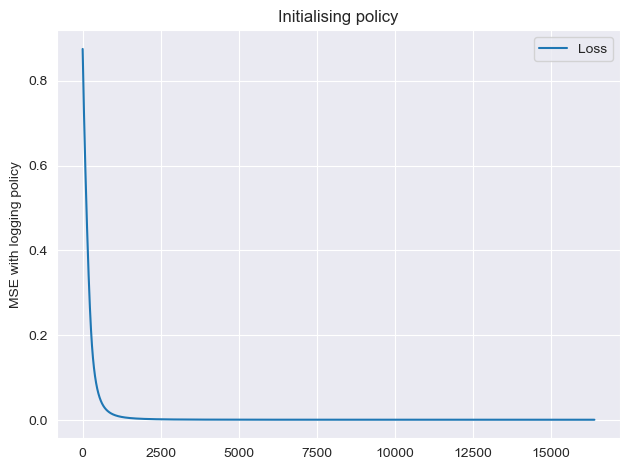

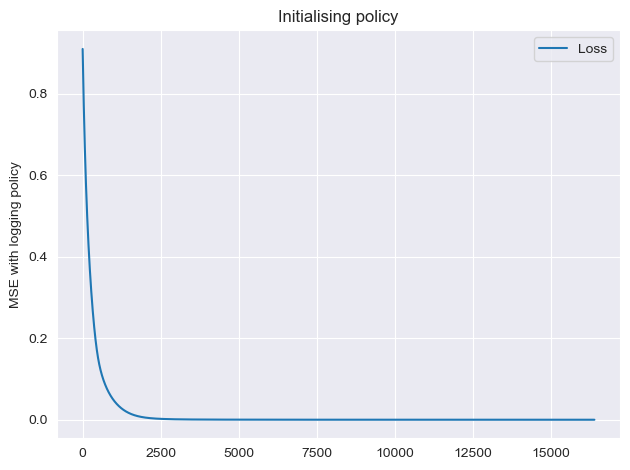

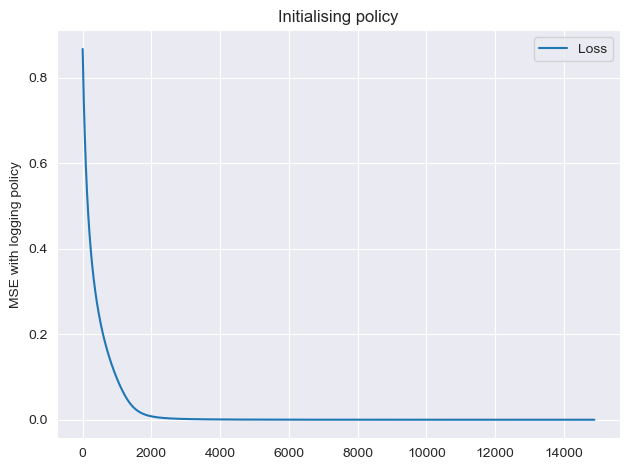

In [5]:
# Placeholders for output
auction_revenue_complex = []
social_welfare_complex = []
social_surplus_complex = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction_complex.simulate_opportunity_complex()

    # Log 'Gross utility' or welfare
    social_welfare_complex.append(sum([agent.gross_utility for agent in auction_complex.agents]))

    # Log 'Net utility' or surplus
    social_surplus_complex.append(sum([agent.net_utility for agent in auction_complex.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction_complex.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue_complex.append(auction_complex.revenue)
    auction_complex.clear_revenue()

# Rescale metrics per auction round
auction_revenue_complex = np.array(auction_revenue_complex) / rounds_per_iter
social_welfare_complex = np.array(social_welfare_complex) / rounds_per_iter
social_surplus_complex = np.array(social_surplus_complex) / rounds_per_iter

In [6]:
trained_welfare_complex = {}
trained_surplus_complex = {}

offline_data_complex = {'train':{}, 'test':{}}


num_data = [80000, 20000]

for i, data_set in enumerate(offline_data_complex.keys()):
    for _ in range(num_data[i]):
        auction_complex.simulate_opportunity_complex()
    for agent_id, agent in enumerate(auction_complex.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data_complex[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction_complex.clear_revenue()

# Save Data

In [7]:
data_dir = f"../data_{estimator}_{competition}_skewed/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data_complex.keys():
    for agent_id in offline_data_complex[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data_complex[data_set][agent_id])

In [8]:
from split_data import split_data

In [10]:
# split_data
for data_set in offline_data_complex.keys():
    for agent_id in offline_data_complex[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir='/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L_skewed/', specical='skewed')

# Read data

In [33]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [5]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [6]:
offline_data = {'train': {}, 'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/train_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}/test_{agent_id}.csv")

# CUTree

In [7]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [8]:
problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=0, split_size=1000,games_directory="../data_DR_L_split/train/")

# disable the max_hist
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000, training_mode='')

In [40]:
train_preds_CUTree_100= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_100/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=300, data_set='train')

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 300
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [41]:
test_preds_CUTree_100 = CUTreeAgent.get_prediction(
    save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_100/',
    game_path='/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=300, data_set='test')

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 300
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [52]:
train_preds_CUTree_1000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_1000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=53, data_set='train')

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 53
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [53]:
test_preds_CUTree_1000 = CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_1000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=53)

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 53
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [54]:
train_preds_CUTree_10000= CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_1000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=5, data_set='train')

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 5
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [55]:
test_preds_CUTree_10000 = CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_1000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=5)

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 5
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [63]:
train_preds_CUTree_1000_25000 = CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_1000_25000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=54, data_set='train')

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 54
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [64]:
test_preds_CUTree_1000_25000 = CUTreeAgent.get_prediction(save_path='/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/DR_L/agent_0/model_boost_linear_qsplit_noabs_save_split_1000_25000/', game_path= '/Users/keithwu/Documents/GitHub/auction-gym/data_DR_L/', read_game_number=54)

<ipykernel.iostream.OutStream object at 0x105807bb0> starting from 54
<ipykernel.iostream.OutStream object at 0x105807bb0> finishing read tree


In [46]:
print("Train MSE: ", mean_squared_error(offline_data['train'][0][:, 7], train_preds_CUTree_100))
print("Test MSE: ", mean_squared_error(offline_data['test'][0][:, 7], test_preds_CUTree_100))
print("Train R2", r2_score(offline_data['train'][0][:, 7], train_preds_CUTree_100))
print("Test R2", r2_score(offline_data['test'][0][:, 7], test_preds_CUTree_100))

Train MSE:  0.005893315038662661
Test MSE:  0.006294849737191402
Train R2 0.8353269442656504
Test R2 0.8261133012824402


In [56]:
print("Train MSE: ", mean_squared_error(offline_data['train'][0][:, 7], train_preds_CUTree_1000))
print("Test MSE: ", mean_squared_error(offline_data['test'][0][:, 7], test_preds_CUTree_1000))
print("Train R2", r2_score(offline_data['train'][0][:, 7], train_preds_CUTree_1000))
print("Test R2", r2_score(offline_data['test'][0][:, 7], test_preds_CUTree_1000))

Train MSE:  0.004613079000994939
Test MSE:  0.005264329991632608
Train R2 0.8710997442943114
Test R2 0.8545800135948504


In [57]:
print("Train MSE: ", mean_squared_error(offline_data['train'][0][:, 7], train_preds_CUTree_10000))
print("Test MSE: ", mean_squared_error(offline_data['test'][0][:, 7], test_preds_CUTree_10000))
print("Train R2", r2_score(offline_data['train'][0][:, 7], train_preds_CUTree_10000))
print("Test R2", r2_score(offline_data['test'][0][:, 7], test_preds_CUTree_10000))

Train MSE:  0.006411893462850469
Test MSE:  0.006698103921559321
Train R2 0.8208366458192452
Test R2 0.8149739505764986


In [65]:
print("Train MSE: ", mean_squared_error(offline_data['train'][0][:, 7], train_preds_CUTree_1000_25000))
print("Test MSE: ", mean_squared_error(offline_data['test'][0][:, 7], test_preds_CUTree_1000_25000))
print("Train R2", r2_score(offline_data['train'][0][:, 7], train_preds_CUTree_1000_25000))
print("Test R2", r2_score(offline_data['test'][0][:, 7], test_preds_CUTree_1000_25000))

Train MSE:  0.004590672616912524
Test MSE:  0.00527889391053599
Train R2 0.8717258312607474
Test R2 0.8541777050594239


In [12]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [13]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20 ],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [14]:
# context with bid
context_bid_estimators = {}
for agent_id in offline_data_complex['train'].keys():
    input_train_data = offline_data_complex['train'][agent_id][:, :5]
    label_train_data = offline_data_complex['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data_complex['test'][agent_id][:, :5]
    label_test_data = offline_data_complex['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.9285565659544254
Test R2 score: 0.9332798516992343
Train MSE:  0.0019183819481946316
Test MSE:  0.003141958282107429
Agent 1
Param for GS {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.9259435327099244
Test R2 score: 0.9241032204331436
Train MSE:  0.002989797691526016
Test MSE:  0.005778588202133504
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.908407093314022
Test R2 score: 0.9189375897457286
Train MSE:  0.0017978573763370593
Test MSE:  0.0027494015853468095


In [60]:
# context with bid
context_bid_estimators = {}
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators[agent_id] = best_estimator

# cv fault is 5

Agent 0
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.939977500807298
Test R2 score: 0.9432166202320472
Train MSE:  0.0007279475656844271
Test MSE:  0.002055607736792584
Agent 1
Param for GS {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.8362592024973218
Test R2 score: 0.8408735875192103
Train MSE:  0.004918116758814684
Test MSE:  0.00887821105010684
Agent 2
Param for GS {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.9082426030546044
Test R2 score: 0.913586805727944
Train MSE:  0.0006768606785555625
Test MSE:  0.0015651216108509192


In [41]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [42]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.004906677055637212
Surrogate utility: 0.005488817879097059
R2 score: 0.8630118454135507
Agent: 1
Original utility: 0.047288165889720034
Surrogate utility: 0.0436259102955381
R2 score: 0.8579546731914592
Agent: 2
Original utility: 0.03137086689375815
Surrogate utility: 0.03045715435526283
R2 score: 0.9170638279535878


<AxesSubplot:>

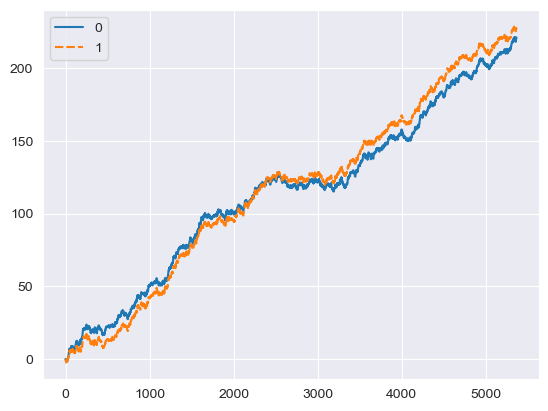

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

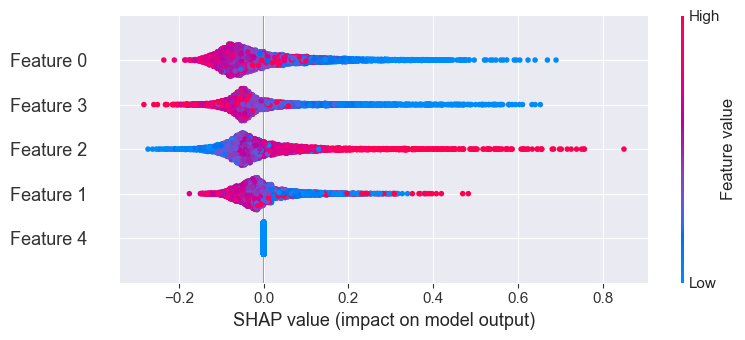

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2